In [1]:
# Cell 1: Import pipeline libraries and create pipeline upon which data and computations are stored

# Pipeline imports
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.experimental import QTradableStocksUS

# Pipeline definition
def  make_pipeline():
    base_universe = QTradableStocksUS()

    # Take simple moving average of 3 days (statistical measurement that smooths time-series curves)
    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3,
    )
    
    volatility_score = 

    # Create filter for top 350 and bottom 350
    # assets based on their sentiment scores
    top_bottom_scores = (
        sentiment_score.top(50) | sentiment_score.bottom(50)
    )

    return Pipeline(
        columns={
            'sentiment_score': sentiment_score,
        },
        # Set screen as the intersection between our filter
        # and trading universe
        screen=(
            base_universe
            & top_bottom_scores
        )
    )

In [3]:
# Cell 2: Initialize and execute pipeline with specified parameters

# Import run_pipeline method
from quantopian.research import run_pipeline

# Specify a time range to evaluate
period_start = '2018-07-01'
period_end = '2018-08-01'

# Execute pipeline over evaluation period
pipeline_output = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

print(pipeline_output)

                                                sentiment_score
2018-07-02 00:00:00+00:00 Equity(3241 [GLW])           2.278333
                          Equity(3846 [DIN])           2.200000
                          Equity(5253 [NDSN])          2.150000
                          Equity(16374 [KRC])          2.780000
                          Equity(18404 [OFC])         -2.700000
                          Equity(24517 [SPPI])         2.160179
                          Equity(24823 [LSI])          2.463333
                          Equity(28023 [HEES])         2.270000
                          Equity(43375 [PARR])        -2.670000
                          Equity(49024 [BOJA])         2.225000
                          Equity(50824 [BCEI])         2.345000
                          Equity(51244 [PQG])          2.300000
2018-07-03 00:00:00+00:00 Equity(2587 [EQT])           2.163333
                          Equity(8863 [RCL])           2.266667
                          Equity(16374 [

<type 'zipline.assets._assets.Equity'>
2018-07-02 00:00:00+00:00    46.050
2018-07-03 00:00:00+00:00    45.150
2018-07-05 00:00:00+00:00    45.250
2018-07-06 00:00:00+00:00    45.750
2018-07-09 00:00:00+00:00    46.800
2018-07-10 00:00:00+00:00    46.150
2018-07-11 00:00:00+00:00    44.200
2018-07-12 00:00:00+00:00    44.125
2018-07-13 00:00:00+00:00    44.450
2018-07-16 00:00:00+00:00    43.300
2018-07-17 00:00:00+00:00    44.800
2018-07-18 00:00:00+00:00    45.650
2018-07-19 00:00:00+00:00    46.750
2018-07-20 00:00:00+00:00    46.650
2018-07-23 00:00:00+00:00    47.500
2018-07-24 00:00:00+00:00    44.200
2018-07-25 00:00:00+00:00    45.400
2018-07-26 00:00:00+00:00    44.500
2018-07-27 00:00:00+00:00    44.450
2018-07-30 00:00:00+00:00    44.850
2018-07-31 00:00:00+00:00    46.650
2018-08-01 00:00:00+00:00    45.700
Freq: C, Name: Equity(41 [ARCB]), dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba84946450>], dtype=object)

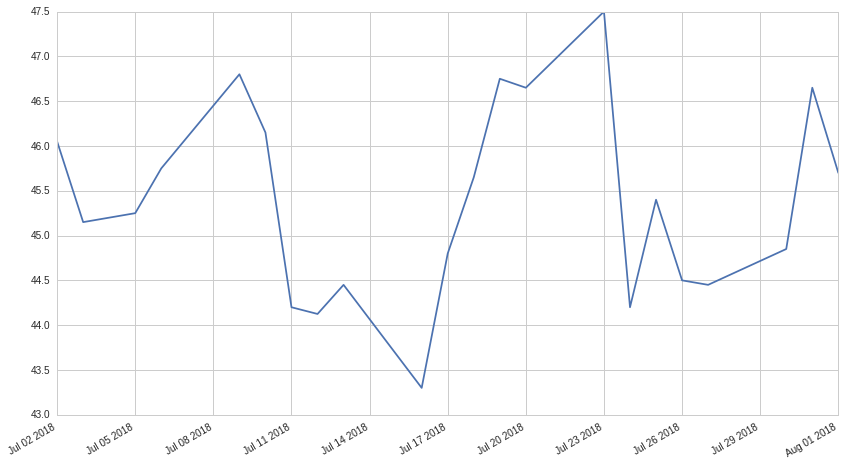

In [9]:
# Cell 3: Import and load prices (not required to load into pipeline)

# Import prices function
from quantopian.research import prices

# Get list of unique assets from the pipeline output
asset_list = pipeline_output.index.levels[1].unique()
print(type(asset_list[0]))

# Query pricing data for all assets present during evaluation period
asset_prices = prices(
    asset_list[0],
    start=period_start,
    end=period_end
)
print(asset_prices)
asset_prices.plot(subplots=True)

In [37]:
# Cell 4: Initialize testing and analysis library: AlphaLens

# Import Alphalens
import alphalens as al

# Get asset forward returns and quantile classification based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['sentiment_score'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,10),
)

# Display first 5 rows
factor_data.head(100)

Dropped 17.5% entries from factor data: 17.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D  \
date                      asset                                        
2018-06-01 00:00:00+00:00 Equity(8162 [WAFD])     0.020000  0.044615   
                          Equity(11598 [AIV])     0.014620  0.016569   
                          Equity(21328 [SLF])     0.005309  0.027027   
                          Equity(23966 [PPBI])    0.005967  0.008353   
                          Equity(25781 [NG])     -0.025696 -0.047109   
                          Equity(27041 [PFBC])    0.030753  0.053208   
                          Equity(39041 [CHSP])    0.009546 -0.008954   
                          Equity(44929 [NGHC])   -0.036149 -0.011917   
                          Equity(49448 [PJT])    -0.001997  0.031222   
                          Equity(50040 [ATKR])   -0.014699  0.030317   
                          Equity(50444 [LEXE_A])  0.001158  0.033580   
2018-06-04 00:00:00+00:00 Equity(7334 [TCF])     -0.007440 -0.002604   
                          Equity(8162 [WAFD])     0.004525  0.009050   
                          Equity(21328 [SLF])     0.002880  0.017283   
                          Equity(23966 [PPBI])   -0.001186 -0.014235   
                          Equity(27041 [PFBC])   -0.004086 -0.003631   
                          Equity(38759 [ARI])    -0.001041  0.009371   
                          Equity(50361 [ADSW])    0.001282  0.016660   
2018-06-05 00:00:00+00:00 Equity(7308 [TARO])     0.000083 -0.008046   
                          Equity(7334 [TCF])      0.014993 -0.002999   
                          Equity(8162 [WAFD])     0.019520  0.001502   
                          Equity(21328 [SLF])     0.006941  0.002154   
                          Equity(23814 [SBCF])    0.014870  0.034559   
                          Equity(40783 [BKU])     0.016747  0.015835   
                          Equity(47380 [WMS])     0.006849  0.003425   
                          Equity(49448 [PJT])     0.005989  0.029764   
                          Equity(50361 [ADSW])    0.010666  0.023464   
2018-06-06 00:00:00+00:00 Equity(1270 [CATY])     0.004587 -0.024312   
                          Equity(7308 [TARO])    -0.001908 -0.012276   
                          Equity(7334 [TCF])     -0.003323 -0.013663   
...                                                    ...       ...   
2018-06-12 00:00:00+00:00 Equity(10639 [MAA])    -0.011329 -0.008346   
                          Equity(32674 [LTXB])   -0.000941  0.000471   
                          Equity(38668 [STWD])   -0.001338  0.012412   
                          Equity(50333 [TRHC])    0.039406  0.049301   
2018-06-13 00:00:00+00:00 Equity(41 [ARCB])      -0.011423 -0.013499   
                          Equity(8580 [CB])      -0.019666 -0.045205   
                          Equity(9348 [CPT])      0.011680  0.016615   
                          Equity(10639 [MAA])     0.009062  0.019585   
                          Equity(13720 [RE])     -0.005981  0.012138   
                          Equity(17227 [HSKA])   -0.001963 -0.014019   
                          Equity(19709 [HT])      0.019938  0.030153   
                          Equity(24440 [PRAA])    0.009828  0.025799   
                          Equity(26553 [ACC])    -0.001634 -0.001634   
                          Equity(38633 [ASPS])   -0.015201  0.022639   
                          Equity(48575 [XHR])     0.000414  0.010630   
2018-06-14 00:00:00+00:00 Equity(879 [BIO])      -0.000988 -0.012514   
                          Equity(2071 [D])        0.011462  0.016346   
                          Equity(2587 [EQT])     -0.012286 -0.004095   
                          Equity(2853 [FISV])     0.000785 -0.008505   
                          Equity(3629 [HOLX])     0.004722 -0.016650   
                          Equity(4849 [SPGI])     0.005593 -0.003761   
                          Equity(5824 [TPC])     -0.018182 -0.012987   
                          Equity(5876 [PEI])      0.001335  0.026690   
                        

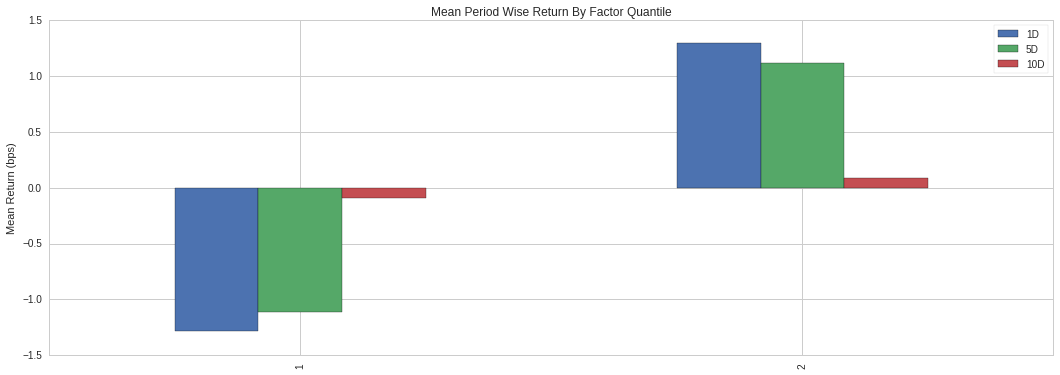

In [29]:
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('1D',)
    )
);

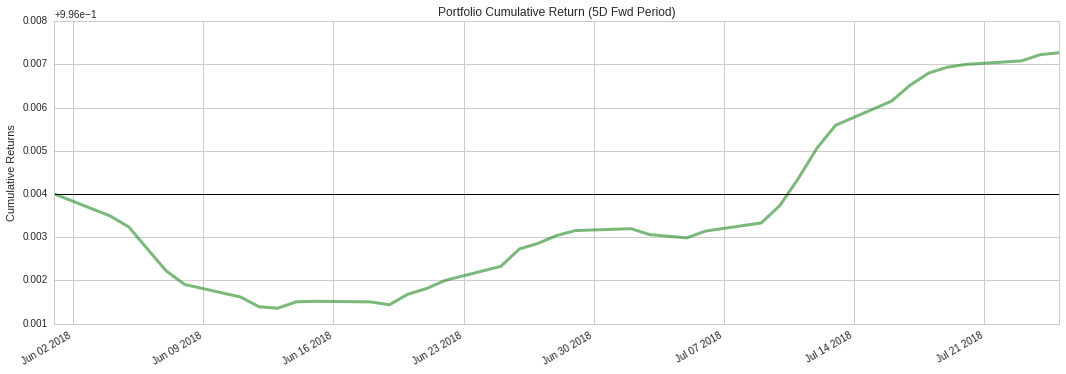

In [30]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['5D'], '5D');